In [175]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize

# Refueling - No penalties

In [176]:
def payload_i (x,y,beta_i):
    Hi=np.exp(-beta_i *y/x) 
    return Hi



def payload_mission(x,y,sequence):
    assert np.abs(np.sum(sequence)- 1)<1e-6, "Error: The sum of betas must be equal to 1"
    H_list=[]
    for beta_i in sequence:
        H_list.append(payload_i(x,y,beta_i))
    Hm=np.min(H_list)
    return Hm




def time_coeff (x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau


def specific_fuel_cons(x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    Hm=payload_mission(x,y,sequence)
    f=mp_refuel/Hm
    return f

# Refueling - with penalties

In [177]:
def payload_i_penalty(x,y,gamma,beta_i):
    Hi=np.exp(-(beta_i+gamma)*y/x) 
    return Hi



def payload_mission_penalty(x,y,gamma,sequence):
    H_list=[]
    for beta_i in sequence[:-1]:
        H_list.append(payload_i_penalty(x,y,gamma,beta_i))
    H_list.append(payload_i(x,y,sequence[-1]))
        
    Hm=np.min(H_list)
    return Hm




def time_coeff_penalty (x,y,gamma,sequence):
    mp_refuel= np.sum(1-np.exp(-(sequence[:-1]+gamma) *y/x)) + 1-np.exp(-sequence[-1]*y/x)
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau




def specific_fuel_cons_penalty(x,y,gamma,sequence):
    mp_refuel= np.sum(1-np.exp(-(sequence[:-1]+gamma) *y/x)) + 1-np.exp(-sequence[-1]*y/x)
    Hm= payload_mission_penalty(x,y,gamma,sequence)
    f=mp_refuel/Hm
    return f

# Reproduce results without refueling

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_28545/408926438.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v/c$',fontsize=16)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


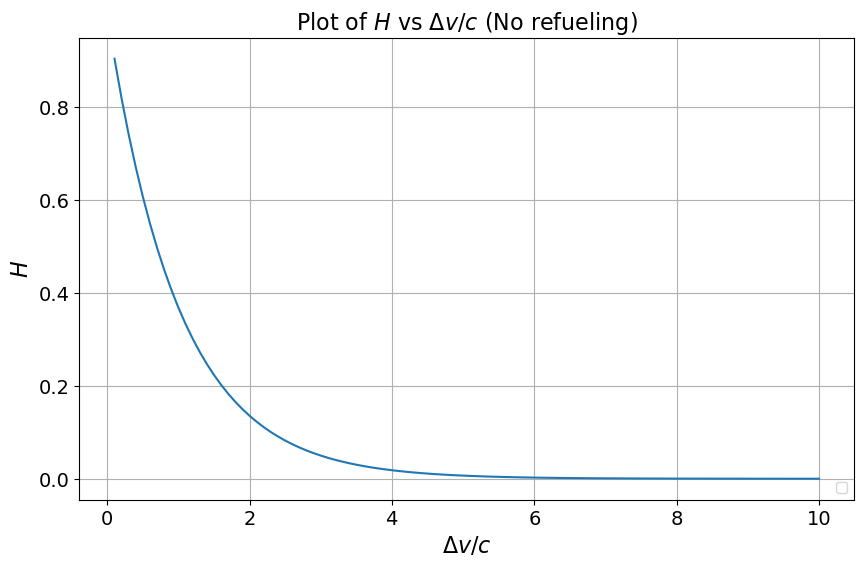

In [180]:
r_vec=np.arange(0.1,10.01,0.1)
fig=plt.figure(figsize=(10,6))
H=payload_i(1,r_vec,1)

plt.plot(r_vec,H)    
plt.xlabel('$\Delta v/c$',fontsize=16)  
plt.ylabel('$H$',fontsize=16)   
plt.title(r'Plot of $H$ vs $\Delta v/c$ (No refueling)',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("figures/chemical/H_delvc.png",bbox_inches='tight')

plt.show()

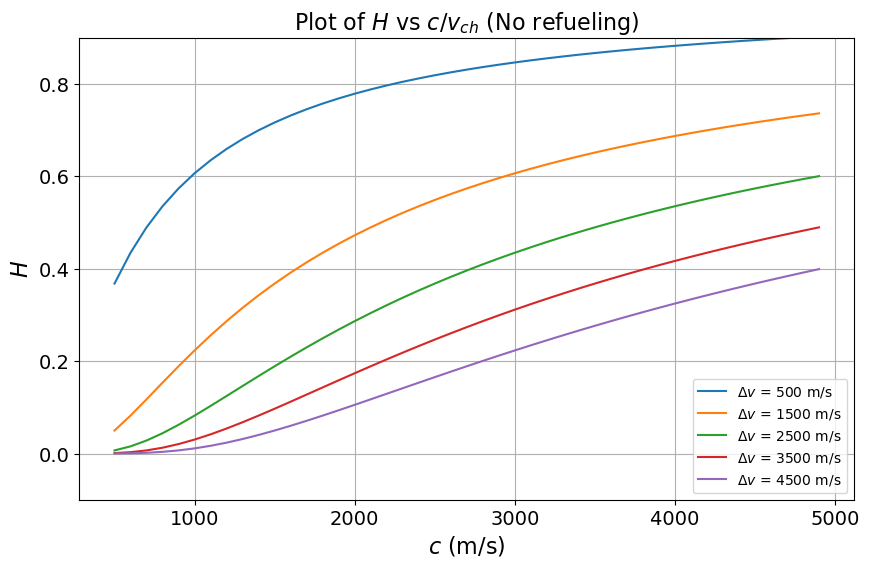

In [181]:
y_vec=np.arange(500,5001,1000)  #Delta v =500m/s to 5000m/s
x_vec=np.arange(500,5000,100)  #c =500m/s to 5000m/s

fig=plt.figure(figsize=(10,6))

for y in y_vec:
    H=payload_i(x_vec,y,1)
    plt.plot(x_vec,H,label=rf"$\Delta v$ = {y} m/s")
    
plt.ylim([-.1,.9])
    
plt.xlabel('$c$ (m/s)',fontsize=16)  
plt.ylabel('$H$',fontsize=16)   
plt.title(r'Plot of $H$ vs $c/v_{ch}$ (No refueling)',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/chemical/H_delvs.png",bbox_inches='tight')
plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_28545/607308233.py:23: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v$',fontsize=16)


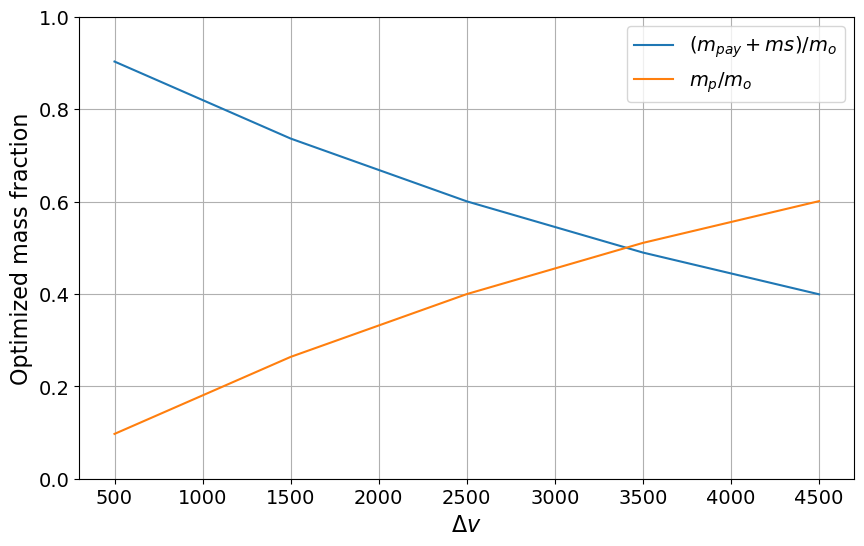

In [67]:

max_H=[]
opt_r2=[]
opt_mp=[]
opt_mps=[]
for y in y_vec:
    H=payload_i(x_vec,y,1)
    x_opt=x_vec[np.argmax(H)]
    mp=1-np.exp(-y/x_opt)
    
    
    max_H.append(np.max(H)) 
    opt_mp.append(np.min(mp))
    
    
fig=plt.figure(figsize=(10,6))    
plt.plot(y_vec,max_H,label=r"$(m_{pay}+m{s})/m_o$")
plt.plot(y_vec,opt_mp,label=r"$m_p/m_o$")


#plt.xlim([0,0.8])   
plt.ylim([0,1])
    
plt.xlabel('$\Delta v$',fontsize=16)  
plt.ylabel('Optimized mass fraction',fontsize=16)     
plt.legend(loc="best",fontsize=14)  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Consider refueling without penalty

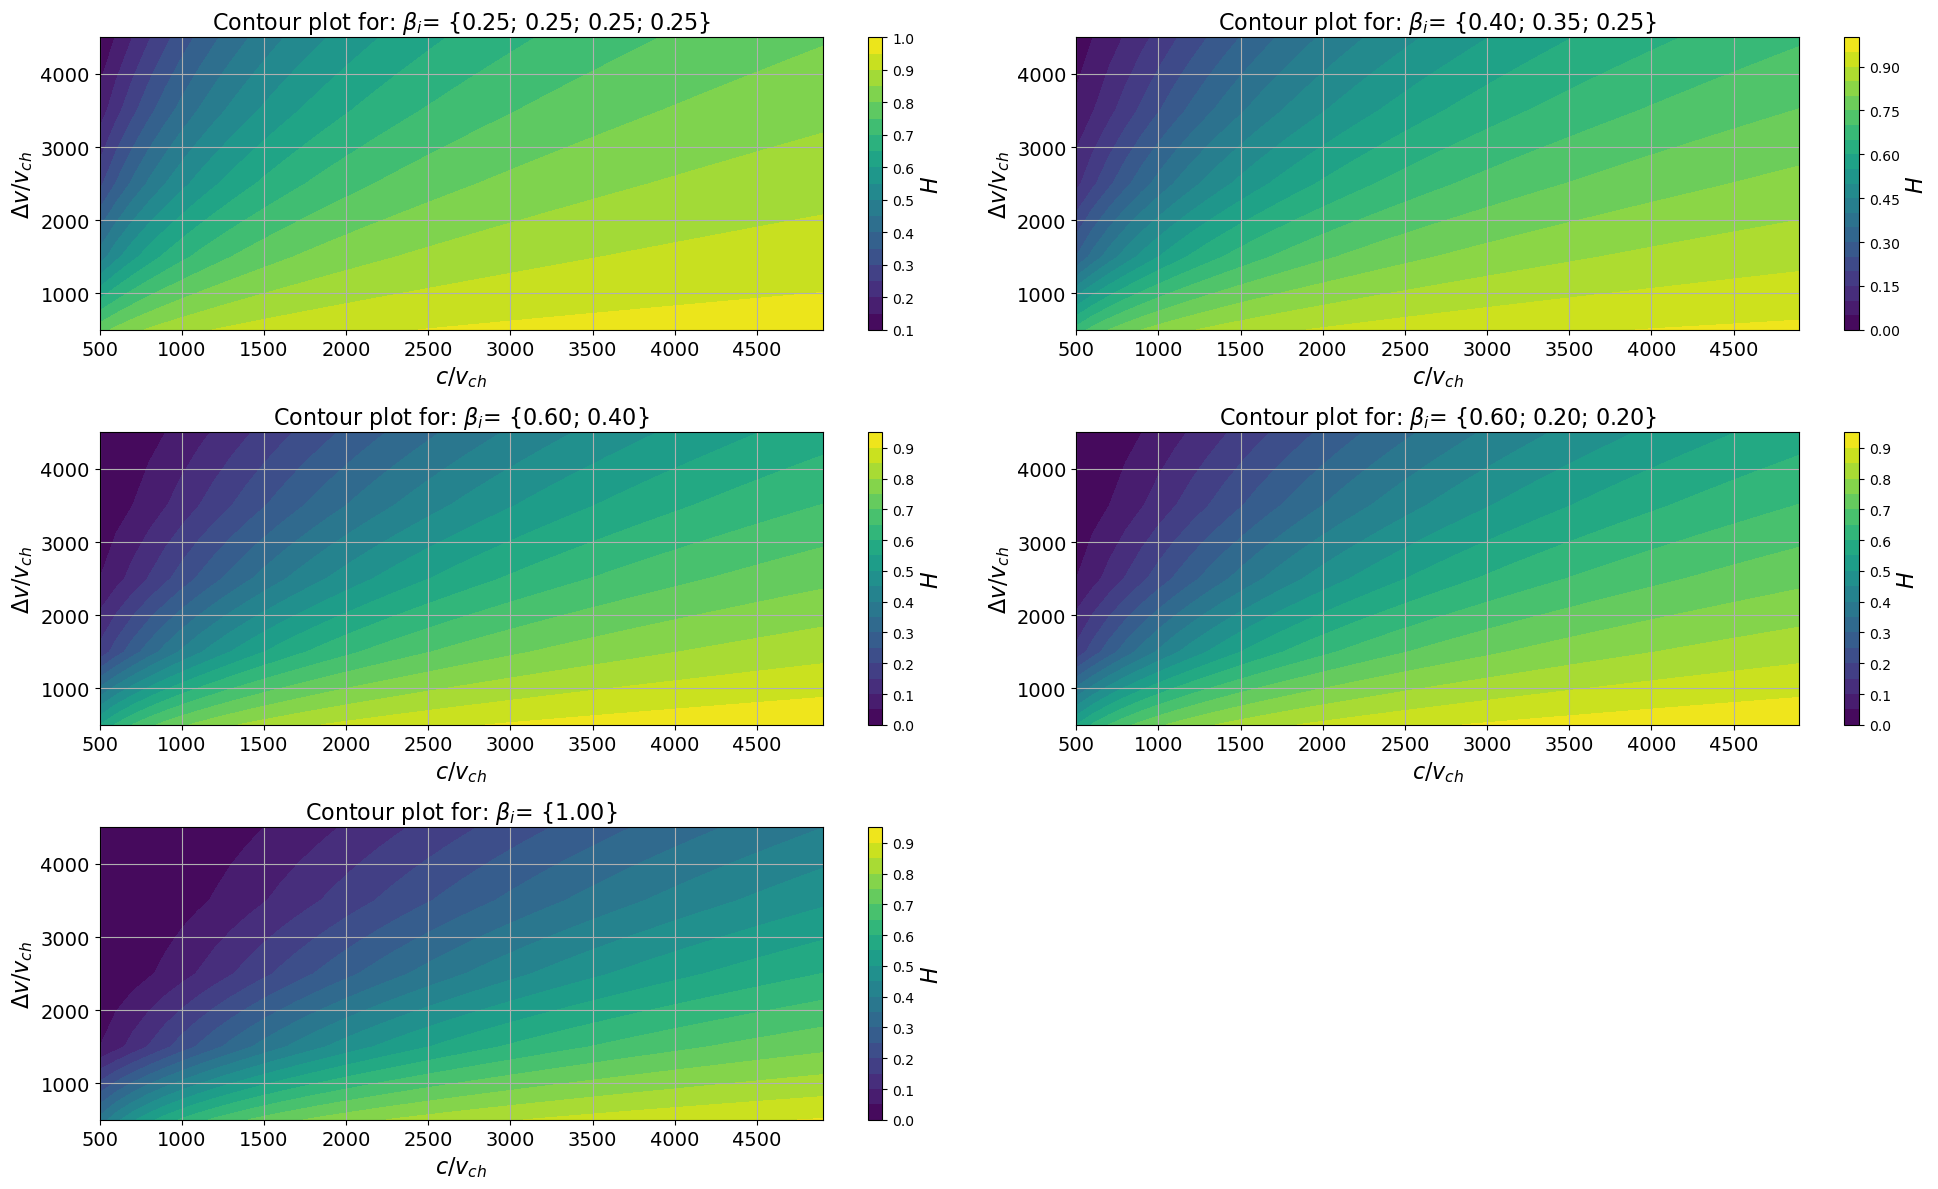

In [182]:
y_vec=np.arange(500.,5001,1000)  #Delta v =500m/s to 5000m/s
x_vec=np.arange(500.,5000,100)  #c =500m/s to 5000m/s
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([.6, .2,.2]),
                      np.array([1])))



fig = plt.figure(figsize=(20, 12))

# Add subplots manually
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5) 

axs=[ax1,ax2,ax3,ax4,ax5]

for idx, sequence in enumerate(sequence_list):
    X, Y = np.meshgrid(x_vec, y_vec)
    Hm_values = np.zeros_like(X)

    for i in range(Y.shape[0]):
        for j in range(X.shape[1]):
            Hm_values[i, j] = payload_mission(X[i, j], Y[i, j], sequence)

    ax = axs[idx]

    contour = ax.contourf(X, Y, Hm_values, levels=20, cmap='viridis')
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label(r'$H$', fontsize=16)

    # Adding the red line where Hm = 0
    contour_lines = ax.contour(X, Y, Hm_values, levels=[0], colors='red', linewidths=4)
    ax.clabel(contour_lines, inline=True, fontsize=16, fmt=r'$H=0$')

    ax.set_xlabel(r'$c/v_{ch}$', fontsize=16)
    ax.set_ylabel(r'$\Delta v/v_{ch}$', fontsize=16)
    title_str = r'Contour plot for: $\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    ax.set_title(title_str, fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()



plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_28545/2670289691.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v/c$',fontsize=16)


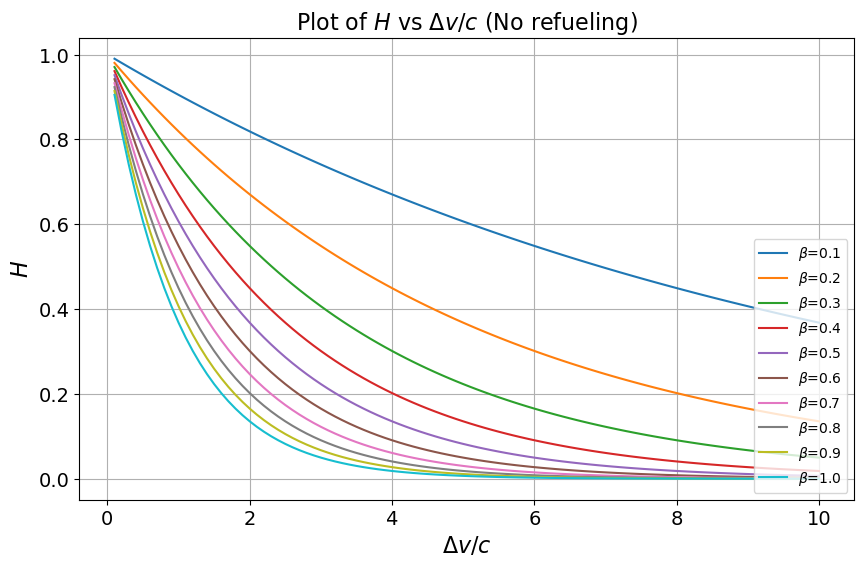

In [51]:
r_vec=np.arange(0.1,10.01,0.1)
beta_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

fig=plt.figure(figsize=(10,6))
for beta in beta_vec:
    H=payload_i(1,r_vec,beta)     
    plt.plot(r_vec,H,label=rf'$\beta$={beta}')
    
plt.xlabel('$\Delta v/c$',fontsize=16)  
plt.ylabel('$H$',fontsize=16)   
plt.title(r'Plot of $H$ vs $\Delta v/c$ (No refueling)',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Consider refueling with penalty

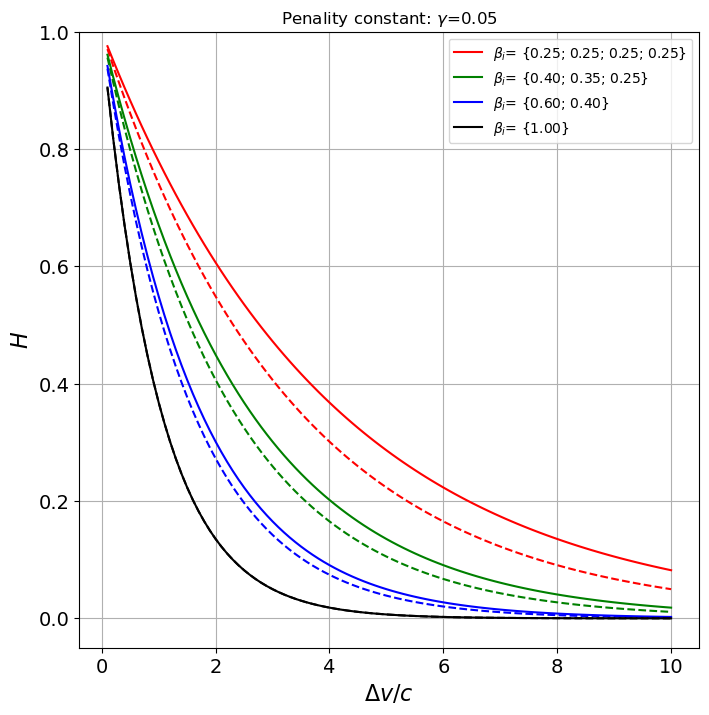

In [183]:
gamma=0.05

sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1])))

color_list=["r","g","b","k"]


fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    Hm_noref=[]
    Hm_ref=[]

    for r in r_vec:
        Hm_noref.append(payload_mission(1,r,sequence))
        Hm_ref.append(payload_mission_penalty(1,r,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(r_vec,Hm_noref,"-",color=color_list[idx],label=str)
    plt.plot(r_vec,Hm_ref,"--",color=color_list[idx])
    
plt.ylim([-.05,1])
plt.xlabel(r'$\Delta v/c$',fontsize=16)  
plt.ylabel(r'$H$',fontsize=16)   
plt.title(rf"Penality constant: $\gamma$={gamma}")
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("figures/chemical/H_delvc_penalty.png",bbox_inches='tight')




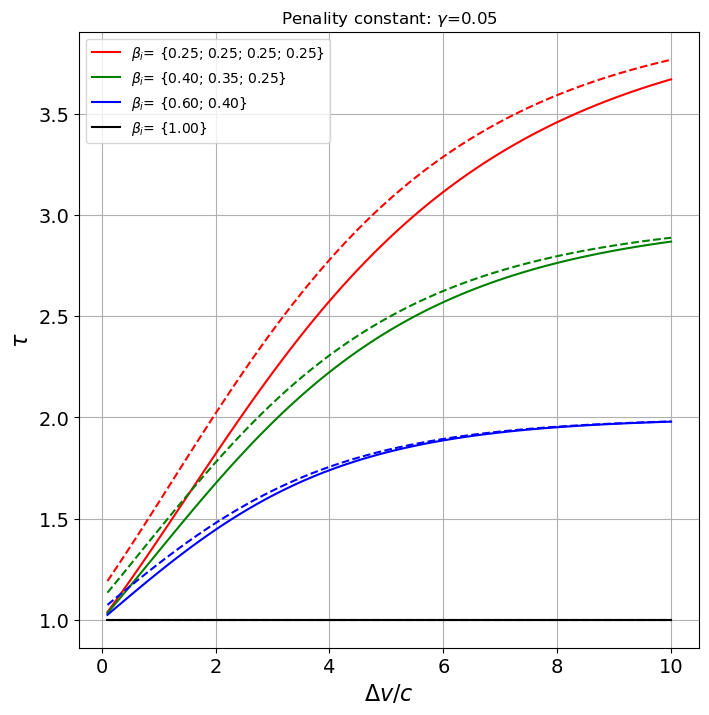

In [184]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1]),
                   ))
color_list=["r","g","b","k"]

fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    tau_noref=[]
    tau_ref=[]


    for r in r_vec:
        tau_noref.append(time_coeff(1,r,sequence))
        tau_ref.append(time_coeff_penalty (1,r,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(r_vec,tau_noref,"-",color=color_list[idx],label=str)
    plt.plot(r_vec,tau_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$\Delta v/c$',fontsize=16)  
plt.ylabel(r'$\tau$',fontsize=16)  
plt.title(rf"Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("figures/chemical/tau_delvc_penalty.png",bbox_inches='tight')

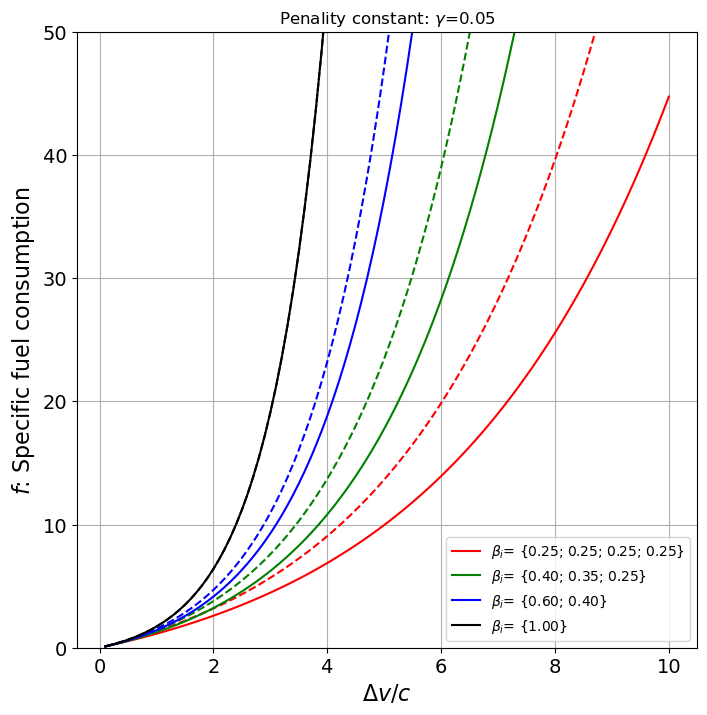

In [185]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1]),
                   ))
color_list=["r","g","b","k"]

fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    f_noref=[]
    f_ref=[]


    for r in r_vec:
        f_noref.append(specific_fuel_cons(1,r,sequence))
        f_ref.append(specific_fuel_cons_penalty (1,r,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(r_vec,f_noref,"-",color=color_list[idx],label=str)
    plt.plot(r_vec,f_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$\Delta v/c$',fontsize=16)  
plt.ylabel(r'$f$: Specific fuel consumption',fontsize=16) 
plt.title(rf"Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0,50])

plt.legend()
plt.savefig("figures/chemical/f_delvc_penalty.png",bbox_inches='tight')


# Fix $\Delta v$ and vary c

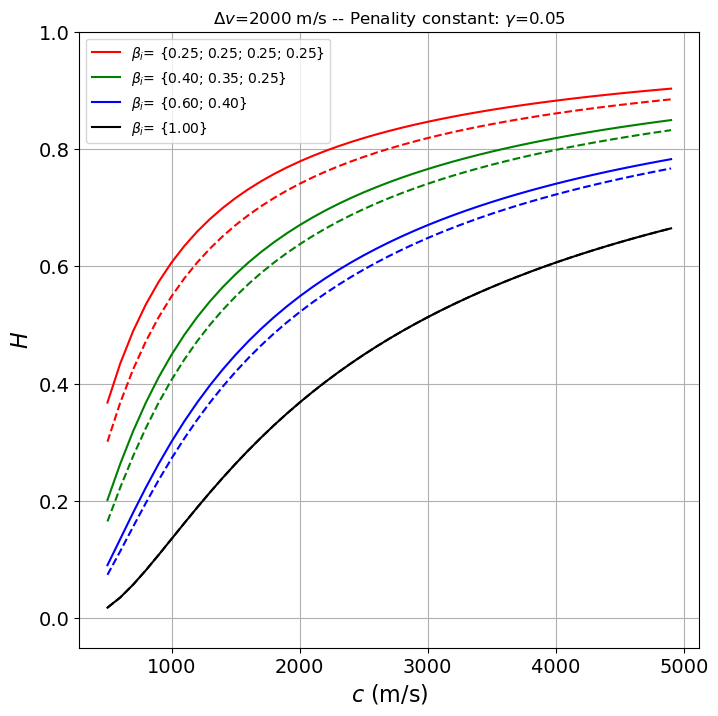

In [186]:
y=2000  #Delta v =500m/s to 5000m/s
x_vec=np.arange(500,5000,100)  #c =500m/s to 5000m/s


gamma=0.05

sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1])))

color_list=["r","g","b","k"]


fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    Hm_noref=[]
    Hm_ref=[]

    for x in x_vec:
        Hm_noref.append(payload_mission(x,y,sequence))
        Hm_ref.append(payload_mission_penalty(x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,Hm_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,Hm_ref,"--",color=color_list[idx])
    
plt.ylim([-.05,1])
plt.xlabel(r'$c$ (m/s)',fontsize=16)  
plt.ylabel(r'$H$',fontsize=16)   
plt.title(rf"$\Delta v$={y} m/s -- Penality constant: $\gamma$={gamma}")
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

plt.savefig("figures/chemical/H_c_penalty.png",bbox_inches='tight')


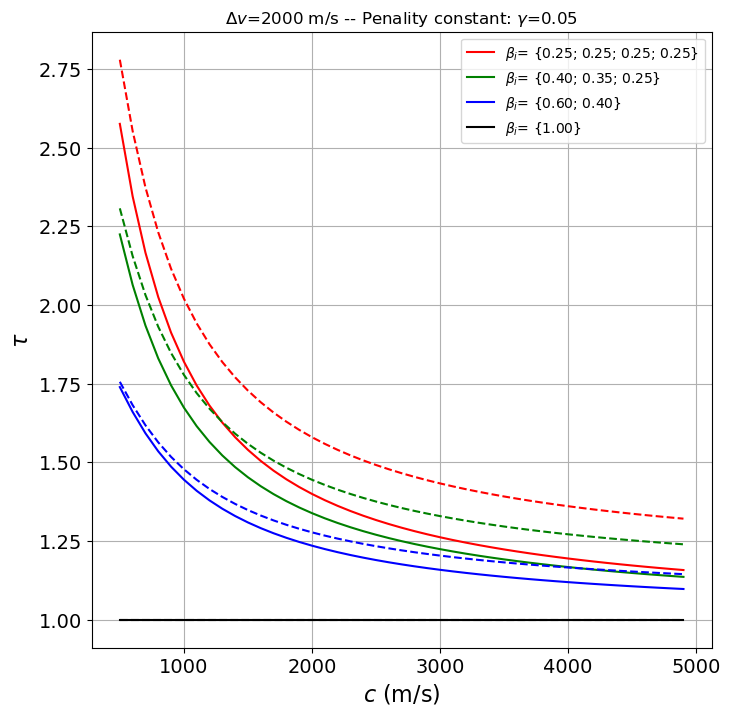

In [189]:
fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    tau_noref=[]
    tau_ref=[]


    for x in x_vec:
        tau_noref.append(time_coeff(x,y,sequence))
        tau_ref.append(time_coeff_penalty (x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,tau_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,tau_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$c$ (m/s)',fontsize=16)  
plt.ylabel(r'$\tau$',fontsize=16)  
plt.title(rf"$\Delta v$={y} m/s -- Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

plt.savefig("figures/chemical/tau_c_penalty.png",bbox_inches='tight')


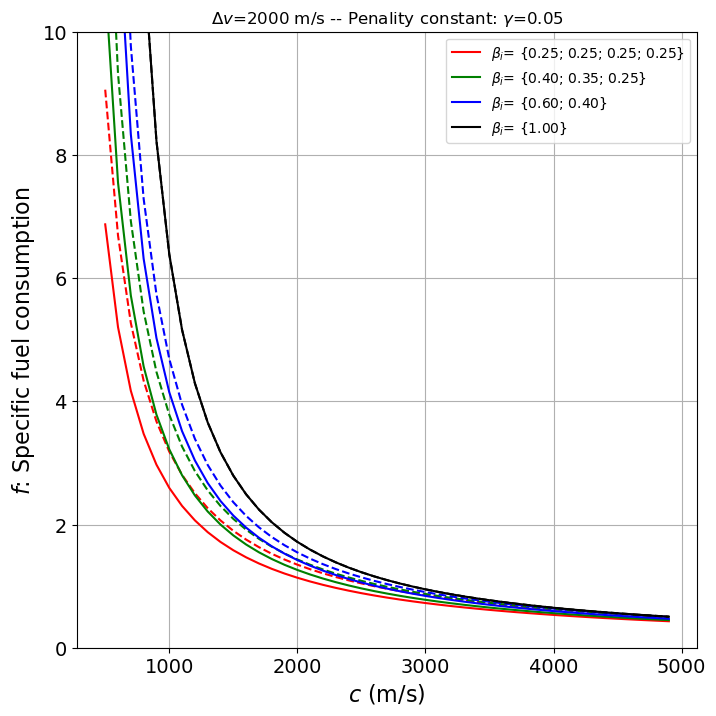

In [188]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1]),
                   ))
color_list=["r","g","b","k"]

fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    f_noref=[]
    f_ref=[]


    for x in x_vec:
        f_noref.append(specific_fuel_cons(x,y,sequence))
        f_ref.append(specific_fuel_cons_penalty (x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,f_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,f_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$c$ (m/s)',fontsize=16) 
plt.ylabel(r'$f$: Specific fuel consumption',fontsize=16) 
plt.title(rf"$\Delta v$={y} m/s -- Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0,10])

plt.legend()

plt.savefig("figures/chemical/f_c_penalty.png",bbox_inches='tight')
